In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Bank Customer Churn.csv')
data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
data.shape

(10000, 12)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

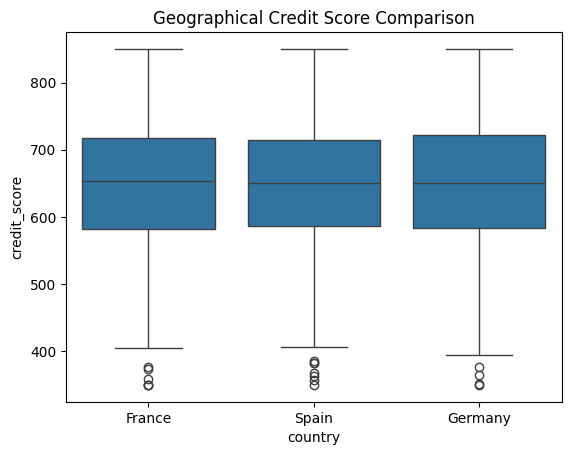

In [ ]:
# 1. Geographical Credit Score Comparison
sns.boxplot(x='country', y='credit_score', data=data)
plt.title('Geographical Credit Score Comparison')
plt.show()

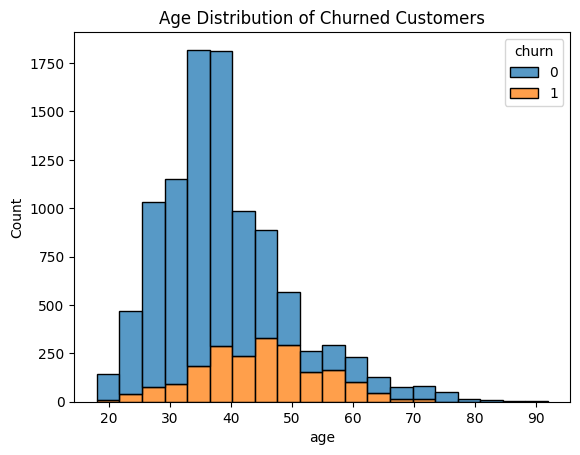

In [ ]:
sns.histplot(data=data, x='age', hue='churn', multiple='stack', bins=20)
plt.title('Age Distribution of Churned Customers')
plt.show()

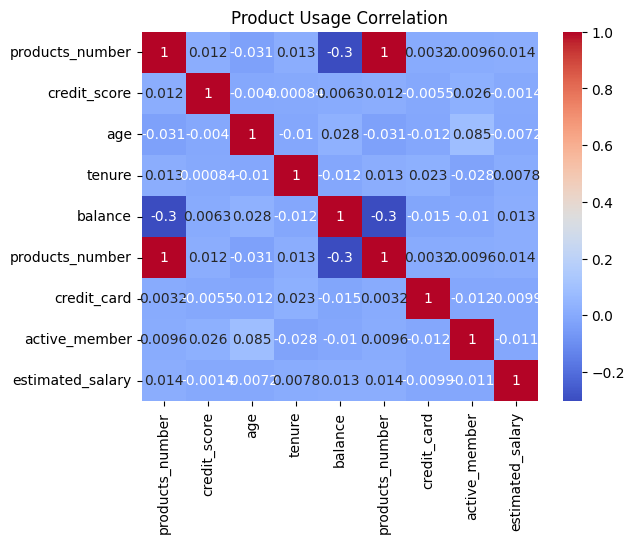

In [ ]:
sns.heatmap(data[['products_number', 'credit_score','age','tenure','balance','products_number','credit_card','active_member','estimated_salary']].corr(), annot=True, cmap='coolwarm')
plt.title('Product Usage Correlation')
plt.show()

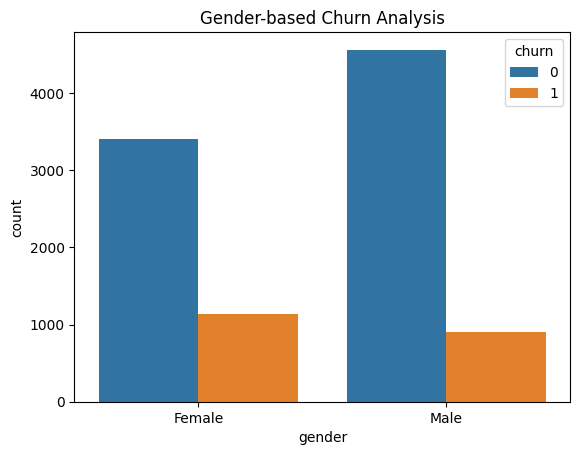

In [ ]:
sns.countplot(x='gender', hue='churn', data=data)
plt.title('Gender-based Churn Analysis')
plt.show()

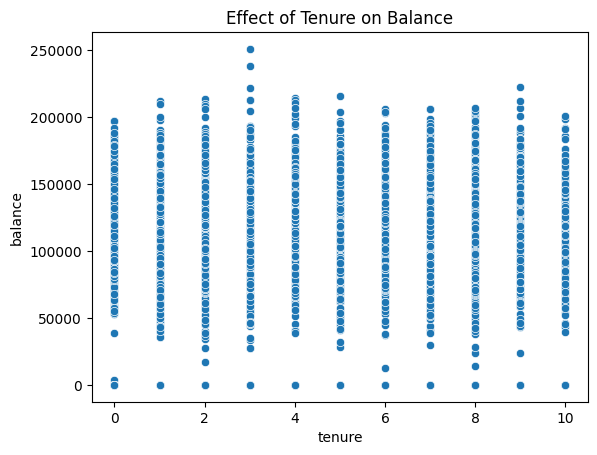

In [ ]:
sns.scatterplot(x='tenure', y='balance', data=data)
plt.title('Effect of Tenure on Balance')
plt.show()


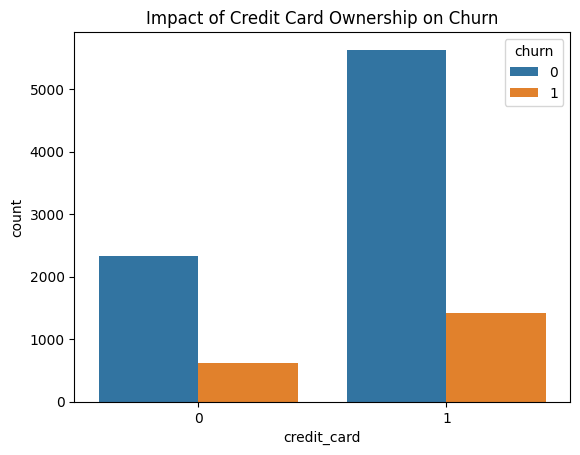

In [ ]:
sns.countplot(x='credit_card', hue='churn', data=data)
plt.title('Impact of Credit Card Ownership on Churn')
plt.show()

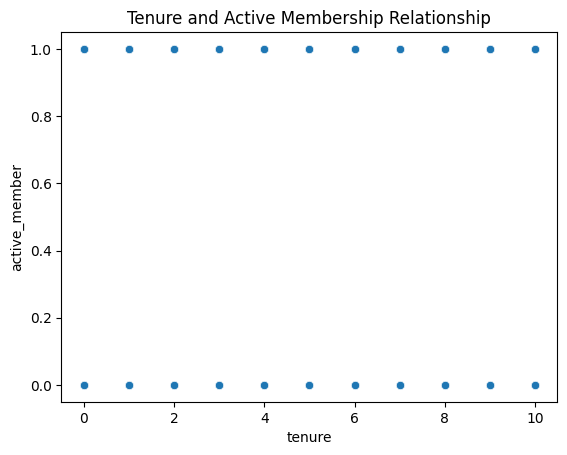

In [ ]:
sns.scatterplot(x='tenure', y='active_member', data=data)
plt.title('Tenure and Active Membership Relationship')
plt.show()

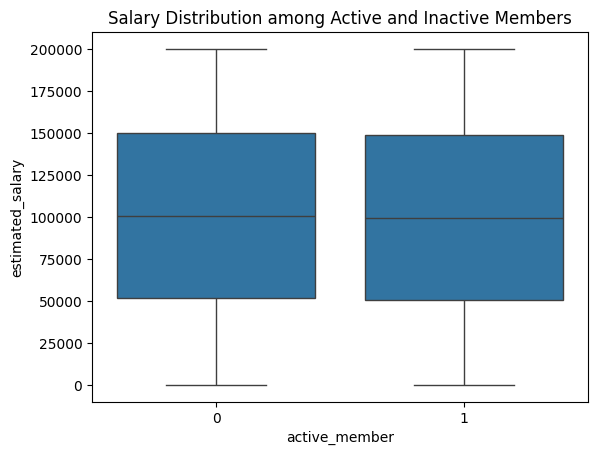

In [ ]:
# 8. Salary Distribution among Active and Inactive Members
sns.boxplot(x='active_member', y='estimated_salary', data=data)
plt.title('Salary Distribution among Active and Inactive Members')
plt.show()

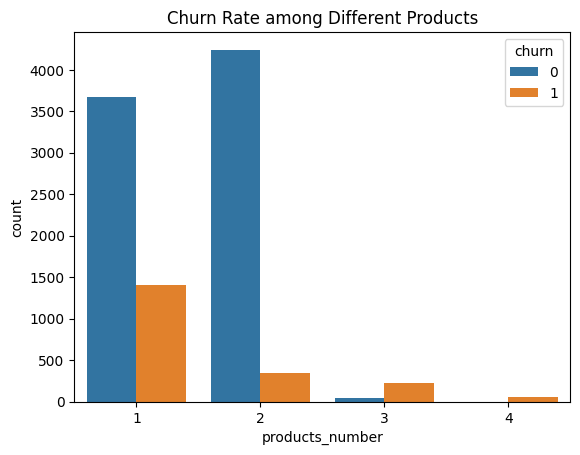

In [ ]:

sns.countplot(x='products_number', hue='churn', data=data)
plt.title('Churn Rate among Different Products')
plt.show()

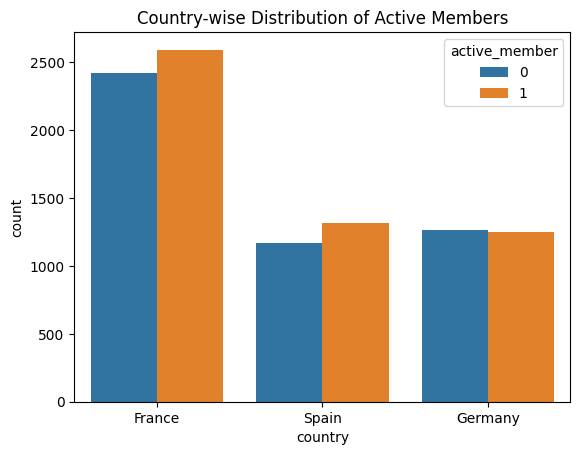

In [ ]:

sns.countplot(x='country', hue='active_member', data=data)
plt.title('Country-wise Distribution of Active Members')
plt.show()

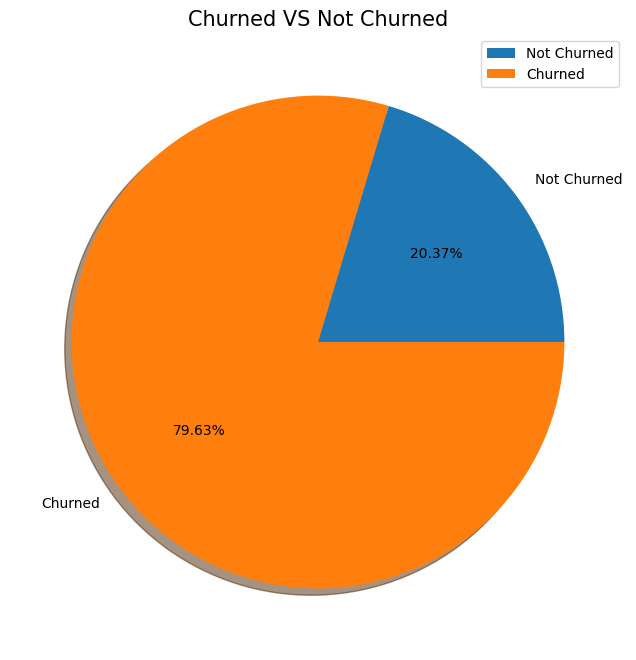

In [ ]:
sizes = [data.churn[data['churn']==1].count(), data.churn[data['churn']==0].count()]
labels = ['Not Churned','Churned']
figure, axes = plt.subplots(figsize=(10, 8))
axes.pie(sizes, labels=labels,shadow=True,autopct = '%1.2f%%')
plt.legend()
plt.title("Churned VS Not Churned", size = 15)
plt.show()

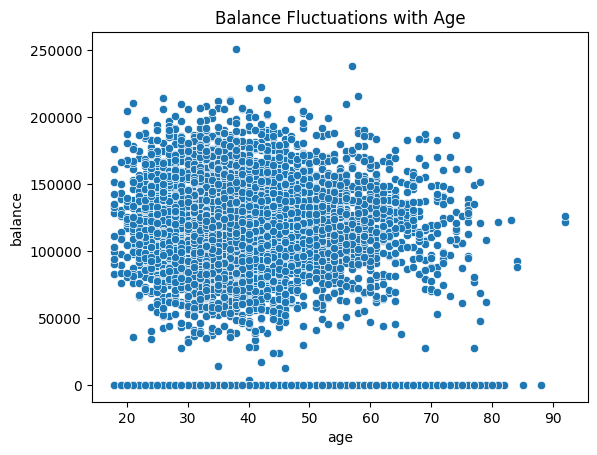

In [ ]:
sns.scatterplot(x='age', y='balance', data=data)
plt.title('Balance Fluctuations with Age')
plt.show()

In [ ]:
data['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
data.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [ ]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
le = LabelEncoder()
data['country'] = le.fit_transform(data['country'])
data['gender'] = le.fit_transform(data['gender'])
data['balance'] = le.fit_transform(data['balance'])
data['estimated_salary'] = le.fit_transform(data['estimated_salary'])
data['credit_score'] = le.fit_transform(data['credit_score'])



In [ ]:
data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,228,0,0,42,2,0,1,1,1,5068,1
1,15647311,217,2,0,41,1,743,1,0,1,5639,0
2,15619304,111,0,0,42,8,5793,3,1,0,5707,1
3,15701354,308,0,0,39,1,0,2,0,0,4704,0
4,15737888,459,2,0,43,2,3696,1,1,1,3925,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,380,0,1,39,5,0,2,1,0,4827,0
9996,15569892,125,0,1,35,10,124,1,1,1,5087,0
9997,15584532,318,0,0,36,7,0,1,0,1,2062,1
9998,15682355,381,1,1,42,3,427,2,1,0,4639,1


In [ ]:
X = data.drop(['customer_id', 'churn'], axis=1)
y = data['churn']

In [ ]:
X.shape

(10000, 10)

In [ ]:
y.shape

(10000,)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [ ]:
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(X_train_scaled, y_train)

SVC()

In [ ]:
y_pred_svc = model_svc.predict(X_test_scaled)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.78      0.36      0.49       393

    accuracy                           0.85      2000
   macro avg       0.82      0.67      0.70      2000
weighted avg       0.85      0.85      0.83      2000



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [ ]:
import statsmodels.api as sm
model = sm.Logit(data['churn'], sm.add_constant(data['estimated_salary']))
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.505416
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sun, 04 Feb 2024   Pseudo R-squ.:               0.0001444
Time:                        05:49:44   Log-Likelihood:                -5054.2
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                    0.2270
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.4155      0.050    -28.287      0.000      -1.514      -1.317
estimated_s

In [ ]:
import pickle
#Save the model as a pickle in a file
pickle.dump(clf, open('model_rf.pkl', 'wb'))
#joblib.dump(model, "RandomForestClassifier.pkl")

In [ ]:
import pickle
#Save the model as a pickle in a file
pickle.dump(model_svc, open('model_svc.pkl', 'wb'))
